# Preprocessing

The first part of preprocessing is done in QGIS where the points are bot in daejeon city are excluded from dataset

![title](test_training_not_in_Daejeon.png)

In [ ]:
# Call required libraries

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re

In [ ]:
# Read the datasets separately for traing (2010~2020) and test (2021) separately

df = pd.read_csv('rawdata_Daejeon_2010_2020_English_in polygon.csv', dtype='unicode')
# df = pd.read_csv('rawdata_Daejeon_2021_English_in polygon.csv', dtype='unicode')

In [ ]:
df.info()

In [ ]:
# Delete rows with nan in 'acdnt_age_2_dc' column

df = df.dropna(subset=['acdnt_age_2_dc'])
df = df.reset_index()
del df['index']

In [ ]:
# Fill with correct value : age of second driver

new_age = []
not_accepted_ages = []
for i in range(len(df)):
#     print(i)
    
    s = df['acdnt_age_2_dc'][i]
    
    if len(re.findall("\d+", s))>0:
        x = int(re.findall("\d+", s)[0])
        new_age.append(x)
    else:
        not_accepted_ages.append(i)
    

# Delete rows with not accepted index   
df = df.drop(not_accepted_ages, axis='index')
df = df.reset_index()
del df['index']


df['acdnt_age_2_code'] = new_age

In [ ]:
# Delete rows with nan in 'bdy_injury_part_1_dc' column

df = df.dropna(subset=['bdy_injury_part_1_dc'])
df = df.reset_index()
del df['index']

In [ ]:
# 'other' type had two codes, replaced the codes with one code

df['bdy_injury_part_1_code'] = df['bdy_injury_part_1_code'].replace(to_replace='98', value='Z9')

In [ ]:
# Fill with correct value : injury of second driver

dt = df[['bdy_injury_part_1_dc', 'bdy_injury_part_1_code']]
dt = dt.drop_duplicates(keep='first')
dt = dt.reset_index()
del dt['index']



dt.columns = ['bdy_injury_part_2_dc', 'part']

df1 = df.copy()


df = pd.merge(df1, dt, on = ['bdy_injury_part_2_dc'], how = 'left')
df['bdy_injury_part_2_dc'] = df['part']

del df['part']

In [ ]:
# Delete columns that all the values are Nan

# del df['field_1']
del df['city_idt_code']
del df['city_idt_dc']
del df['acdnt_frm_lv1']
del df['acdnt_frm_lv2']
del df['acdnt_frm_lv3']
del df['acdnt_sta_lv1']
del df['acdnt_sta_lv2']
del df['rn']
del df['rde_id']
del df['rde_nm']
del df['searchCondition']
del df['searchConditionText']
del df['searchKeyword']


# Delete columns that only have one unique value
del df['spt_otlnmap_at']
del df['engn_code']
del df['zoneYn']
del df['pageUnit']
del df['recordCountPerPage']
del df['pageIndex']
del df['yCrdnt']
del df['xCrdnt']

# We have lat and long so we don't need coords in another CRS
del df['x_crdnt']
del df['y_crdnt']


# We have date and time so we don't need coords in another date only
del df['otn_acdnt_no']

# Delete duplicated Columns

del df['dfk_dc'] # we have df['dfk_code'] instead for day of week 
del df['tmzon_div_1_dc'] # we have df['tmzon_div_1_code'] instead for day/night
del df['occrrnc_time_dc'] # we have df['occrrnc_time_code'] instead for occurance time
del df['legaldong_name'] # we have df['legaldong_code'] instead for location (dongs)

# delete these later for visualization
# We use ds for prediction task
ds = df.copy()

del ds['acdnt_hdc'] # we have ds['acdnt_hcode'] instead wich shows accident type
                    # like car to person or car to car etc...
del ds['acdnt_mdc'] # we have ds['acdnt_mcode'] instead wich shows accident type
                     # like crossing, collision etc...
del ds['lrg_violt_1_dc'] # we have ds['lrg_violt_1_code'] instead wich shows accident reason
                    # like failure to drive safe etc...
del ds['wether_sttus_dc'] # we have ds['wether_sttus_code'] instead wich shows weather status
del ds['road_stle_dc'] # we have ds['road_stle_code'] instead wich shows road style
del ds['acdnt_gae_dc'] # we have ds['acdnt_gae_code'] instead wich shows severity type 
                       # like fatal or minor accident
del ds['wrngdo_vhcle_asort_hdc'] # we have ds['wrngdo_vhcle_asort_hcode'] instead wich shows 
                       # vehicle type engaged like more than one vehicle, 4 wheels, etc
del ds['wrngdo_vhcle_asort_dc'] # we have ds['wrngdo_vhcle_asort_code'] instead wich shows Vehicle type 

# First driver's features
del ds['injury_dgree_1_hdc'] # we have ds['injury_dgree_1_hcode'] instead 
                             # wich shows injury type of one driver
del ds['injury_dgree_1_dc'] # we have ds['injury_dgree_1_code'] instead 
                             # wich shows injury degree of one driver
del ds['acdnt_age_1_dc'] # we have ds['acdnt_age_1_code'] instead 
                             # wich shows age of one driver
del ds['sexdstn_div_1_dc'] # we have ds['sexdstn_div_1_code'] instead 
                             # wich shows sex of one driver  
 

    
    
# Unkown features of first driver
del ds['rdse_sttus_dc']   # we have ds['rdse_sttus_code'] instead 
                             # wich shows the road status
del ds['dmge_vhcle_asort_hdc'] # we have ds['dmge_vhcle_asort_hcode'] instead 
                             # wich shows damage to one driver
del ds['dmge_vhcle_asort_dc'] # we have ds['dmge_vhcle_asort_code'] instead 
                             # wich shows vehicle type of one driver

# Second driver's features    
del ds['injury_dgree_2_hdc'] # we have ds['injury_dgree_2_hcode'] instead 
                             # wich shows injury type of one driver
del ds['injury_dgree_2_dc'] # we have ds['injury_dgree_2_code'] instead 
                             # wich shows injury degree of one driver
del ds['acdnt_age_2_dc'] # we have ds['acdnt_age_2_code'] instead 
                             # wich shows age of one driver
del ds['sexdstn_div_2_dc'] # we have ds['sexdstn_div_2_code'] instead 
                             # wich shows sex of one driver     
# Unknown fetures of the second driver

del ds['bdy_injury_part_1_dc'] # we have ds['bdy_injury_part_1_code'] instead 
                             # wich shows damage to one driver
    
del ds['bdy_injury_part_2_dc'] # we have ds['bdy_injury_part_2_code'] instead 
                             # wich shows damage to other driver
    

    

# the combination of the above columns both are deleted
del ds['acdnt_code']
del ds['acdnt_dc']





# Unkown columns
del ds['acdnt_no']  # it is not unique so we added new field as field_1 for unique value
del ds['acdnt_pos']
del ds['acdnt_des']
del ds['route_nm']
del ds['road_div']

# Not required
del ds['road_no']

In [ ]:
# Change the object type to date type

ds['acdnt_dd_dc'] = pd.to_datetime(ds['acdnt_dd_dc'])

In [ ]:
# Delete rows with nan in 'wrngdo_vhcle_asort_hcode' column

ds = ds.dropna(subset=['wrngdo_vhcle_asort_hcode'])
ds = ds.reset_index()
del ds['index']


# Delete rows with nan in 'injury_dgree_1_hcode' column

ds = ds.dropna(subset=['injury_dgree_1_hcode'])
ds = ds.reset_index()
del ds['index']


# Delete rows with nan in 'acdnt_age_1_code' column

ds = ds.dropna(subset=['acdnt_age_1_code'])
ds = ds.reset_index()
del ds['index']


# Delete rows with nan in 'dmge_vhcle_asort_hcode' column

ds = ds.dropna(subset=['dmge_vhcle_asort_hcode'])
ds = ds.reset_index()
del ds['index']



# Delete rows with nan in 'injury_dgree_2_code' column

ds = ds.dropna(subset=['injury_dgree_2_code'])
ds = ds.reset_index()
del ds['index']


In [ ]:
# Change object type to integer type for numeric values

ds['field_1'] = ds['field_1'].astype(int)
ds['acdnt_year'] = ds['acdnt_year'].astype(int)
ds['dfk_code'] = ds['dfk_code'].astype(int)
ds['tmzon_div_1_code'] = ds['tmzon_div_1_code'].astype(int)
ds['occrrnc_time_code'] = ds['occrrnc_time_code'].astype(int)
ds['acdnt_hcode'] = ds['acdnt_hcode'].astype(int)
ds['acdnt_mcode'] = ds['acdnt_mcode'].astype(int)
ds['lrg_violt_1_code'] = ds['lrg_violt_1_code'].astype(int)
ds['wether_sttus_code'] = ds['wether_sttus_code'].astype(int)
ds['road_stle_code'] = ds['road_stle_code'].astype(int)
ds['acdnt_gae_code'] = ds['acdnt_gae_code'].astype(int)
ds['dprs_cnt'] = ds['dprs_cnt'].astype(int)
ds['sep_cnt'] = ds['sep_cnt'].astype(int)
ds['slp_cnt'] = ds['slp_cnt'].astype(int)
ds['inj_aplcnt_cnt'] = ds['inj_aplcnt_cnt'].astype(int)
ds['wrngdo_vhcle_asort_hcode'] = ds['wrngdo_vhcle_asort_hcode'].astype(int)
ds['wrngdo_vhcle_asort_code'] = ds['wrngdo_vhcle_asort_code'].astype(int)
ds['injury_dgree_1_hcode'] = ds['injury_dgree_1_hcode'].astype(int)
ds['injury_dgree_1_code'] = ds['injury_dgree_1_code'].astype(int)
ds['acdnt_age_1_code'] = ds['acdnt_age_1_code'].astype(int)
ds['sexdstn_div_1_code'] = ds['sexdstn_div_1_code'].astype(int)
ds['dmge_vhcle_asort_hcode'] = ds['dmge_vhcle_asort_hcode'].astype(int)
ds['dmge_vhcle_asort_code'] = ds['dmge_vhcle_asort_code'].astype(int)
ds['injury_dgree_2_code'] = ds['injury_dgree_2_code'].astype(int)
ds['injury_dgree_2_hcode'] = ds['injury_dgree_2_hcode'].astype(int)
ds['acdnt_age_2_code'] = ds['acdnt_age_2_code'].astype(int)
ds['sexdstn_div_2_code'] = ds['sexdstn_div_2_code'].astype(int)
ds['rdse_sttus_code'] = ds['rdse_sttus_code'].astype(int)


# Change object type to Float type for latitude and longitude values

ds['Latitude'] = ds['Latitude'].astype(float)                         
ds['Longitude'] = ds['Longitude'].astype(float)

In [ ]:
# Too long to be int

ds['legaldong_code'] = ds['legaldong_code'].astype(float)

In [ ]:
# Data contains: {'N', 'Y'} values, so we change them to numeric values

ds['hhdgw_at'] = ds['hhdgw_at'].map({'Y': 1, 'N': 0})

In [ ]:
# Creating a instance of label Encoder.

le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label

ds['bdy_injury_part_1_code'] = le.fit_transform(ds['bdy_injury_part_1_code'])
ds['bdy_injury_part_2_code'] = le.fit_transform(ds['bdy_injury_part_2_code'])

In [ ]:
ds.info()

In [ ]:
ds

In [ ]:
# accident month and seaon are optional >>>>> for further analysis not the prediction

# ds['acdnt_month'] = ds['acdnt_dd_dc'].dt.month


# ds['acdnt_season'] = (ds['acdnt_dd_dc'].dt.month%12 + 3)//3

# seasons = {
#              1: 'Winter',
#              2: 'Spring',
#              3: 'Summer',
#              4: 'Autumn'
# }

# ds['season_name'] = ds['season'].map(seasons)

In [ ]:
# to save the datasets >>>> once you saved the training dataset, rerurn the code by reading the test dataset and 
# save that one as well

# ds.to_csv('training_preprocessed.csv')
# ds.to_csv('test_preprocessed.csv')

Accident Density for both test and trainging after preprocessing would look like as follows:\
Note: the grids are chosen 500 km by 500 km that can be chosen in another size

![title](test_training_accident_density.png)

# Prediction Models

After we saved the data from the data preprocessing, we go for data analysis and data modeling.\
The rest of the code can be complied followed by the previous codes if you do not want to reload the data. In this case you have to do all the abobe codings and add 1 to all the df and ds you can see to have two sets of datasets.

In [1]:
# Call the required libraries

import pandas as pd
import itertools
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io
from scipy.stats import boxcox
from sklearn.metrics import classification_report

In [2]:
# Read the training and the test set

train = pd.read_csv('training_preprocessed.csv')
test = pd.read_csv('test_preprocessed.csv')

In [3]:
# read the main training set were we can see the values asscociated with each code to detect the accident severity type

train_real_values = pd.read_csv('rawdata_Daejeon_2010_2020_English_in polygon.csv', dtype='unicode')

In [4]:
# A simple processing for the main trainingset

train_real_values = train_real_values.dropna(subset=['injury_dgree_1_hcode'])
train_real_values = train_real_values.reset_index()

del train_real_values['index']

In [5]:
# Extract the values accociated with each severity number

list_real_values = []

for i in set(list(train_real_values['acdnt_gae_dc'].dropna())):
    for j in range(len(train_real_values)):
        if train_real_values['acdnt_gae_dc'][j] == i:
            list_real_values.append([i, train_real_values['acdnt_gae_code'][j]])
            
            
list_real_values.sort()
list_real_values = list(k for k,_ in itertools.groupby(list_real_values))

In [6]:
# See the values and the severity lvel number
# As can be seen the more the accident is severe, the numbe is lower

list_real_values

[['fatal_accident', '1'],
 ['injury_report_accident', '4'],
 ['minor accident', '3'],
 ['serious_accident', '2']]

In [7]:
# Delete unwanted columns both in traing and the test set

del train['Unnamed: 0']
del test['Unnamed: 0']


del train['field_1']
del test['field_1']

Calcuate the severity score

In [8]:
# There are 5 columns in each datasets that depicts the accident severity, we check them and any correlation between them


print(set(list(train['injury_dgree_1_hcode'])))
print(set(list(train['injury_dgree_1_code']))) 
print(set(list(train['injury_dgree_2_hcode']))) 
print(set(list(train['injury_dgree_2_code'])))
print(set(list(train['acdnt_gae_code'])))


print('===========================================')

print(set(list(test['injury_dgree_1_hcode'])))
print(set(list(test['injury_dgree_1_code']))) 
print(set(list(test['injury_dgree_2_hcode']))) 
print(set(list(test['injury_dgree_2_code'])))
print(set(list(test['acdnt_gae_code'])))

{200, 100, 300, 998}
{100, 230, 998, 300, 210, 220}
{200, 100, 300, 998}
{100, 230, 998, 300, 210, 220}
{1, 2, 3, 4}
{200, 100, 300, 998}
{100, 998, 230, 300, 210, 220}
{200, 100, 300, 998}
{100, 230, 998, 300, 210, 220}
{1, 2, 3, 4}


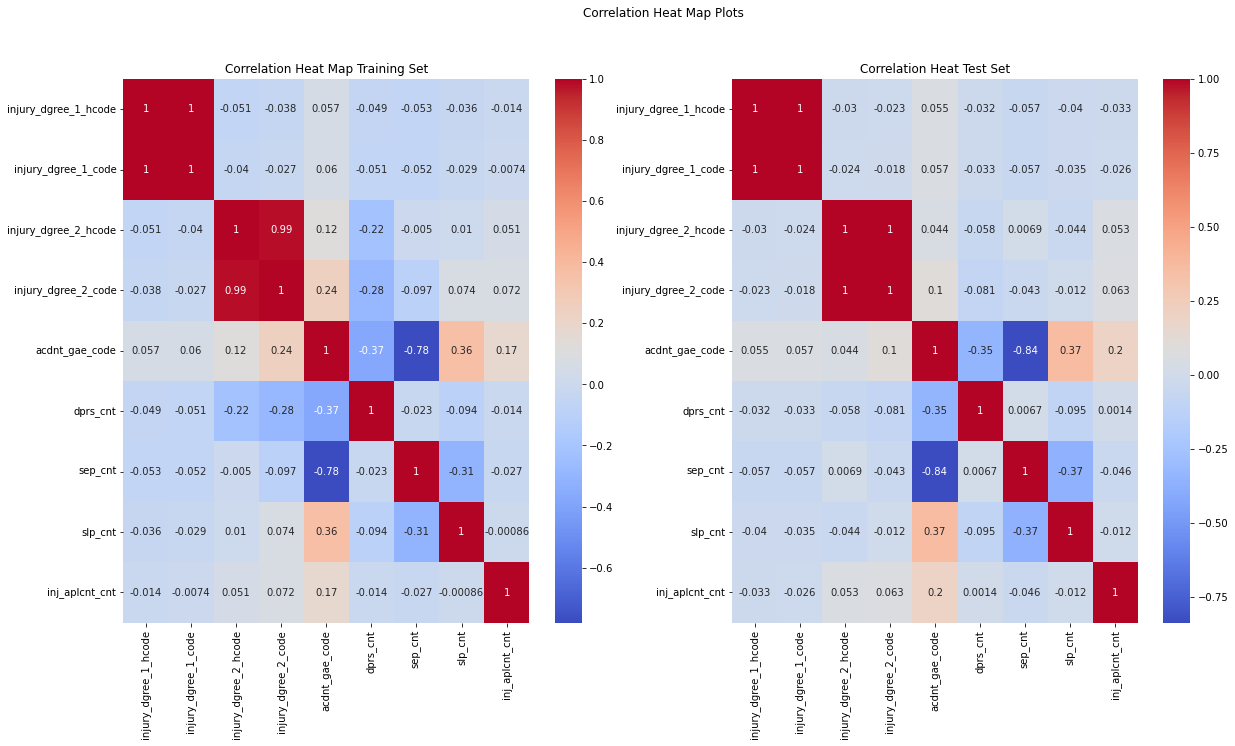

In [9]:
# create two correlation heat map plots

corr1 = train[['injury_dgree_1_hcode', 'injury_dgree_1_code', 'injury_dgree_2_hcode', 'injury_dgree_2_code', 'acdnt_gae_code', 'dprs_cnt', 'sep_cnt', 'slp_cnt', 'inj_aplcnt_cnt']].corr()
corr2 = test[['injury_dgree_1_hcode', 'injury_dgree_1_code', 'injury_dgree_2_hcode', 'injury_dgree_2_code', 'acdnt_gae_code', 'dprs_cnt', 'sep_cnt', 'slp_cnt', 'inj_aplcnt_cnt']].corr()

# set up figure and axes for subplots
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))

# plot first correlation heat map on left subplot
sns.heatmap(corr1, ax=axs[0], cmap="coolwarm", annot=True)
axs[0].set_title("Correlation Heat Map Training Set")

# plot second correlation heat map on right subplot
sns.heatmap(corr2, ax=axs[1], cmap="coolwarm", annot=True)
axs[1].set_title("Correlation Heat Test Set")

# add title to figure
fig.suptitle("Correlation Heat Map Plots")

# display the plot
plt.show()

In [10]:
# As we have two types of injuries reported for different sides of accident and the hcode is generalized of the code, 
# we only keep the codes


del train['injury_dgree_1_hcode']
del train['injury_dgree_1_code'] 
del train['injury_dgree_2_hcode'] 
del train['injury_dgree_2_code']

del test['injury_dgree_1_hcode']
del test['injury_dgree_1_code'] 
del test['injury_dgree_2_hcode'] 
del test['injury_dgree_2_code']


# We exclude casualty number from the dataset as it is highly corelated with severity

del train['dprs_cnt']
del train['sep_cnt']
del train['slp_cnt']
del train['inj_aplcnt_cnt']


del test['dprs_cnt']
del test['sep_cnt']
del test['slp_cnt']
del test['inj_aplcnt_cnt']

In [11]:
# We change the traget name accident severity

train['severity'] = train['acdnt_gae_code']
test['severity'] = test['acdnt_gae_code']


del train['acdnt_gae_code']
del test['acdnt_gae_code']

In [12]:
# Check number of each severity type

# print(set(list(train['severity'])))
# print(set(list(test['severity'])))

print('training set:', train.severity.value_counts())
print('testing set:', test.severity.value_counts())

training set: 3    46288
2    18856
4     1080
1      847
Name: severity, dtype: int64
testing set: 3    5336
2    1357
4     103
1      51
Name: severity, dtype: int64


In [13]:
# As can be seen from the above codes, the severity types are imbalanced, so we define 0 and one class
# the class 1 can be either severity level 1 and 2, or severity level 1 only
# in this case we chose severity level 1 and 2 as severe accidents


df1 = train.copy()

df1['Severity4'] = 0
df1.loc[(df1['severity'] == 1) | (df1['severity'] == 2), 'Severity4'] = 1

df1 = df1.drop(['severity'], axis = 1)
print('training set:', df1.Severity4.value_counts())



df2 = test.copy()

df2['Severity4'] = 0
df2.loc[(df2['severity'] == 1) | (df2['severity'] == 2), 'Severity4'] = 1
df2 = df2.drop(['severity'], axis = 1)
print('testing set:', df2.Severity4.value_counts())

training set: 0    47368
1    19703
Name: Severity4, dtype: int64
testing set: 0    5439
1    1408
Name: Severity4, dtype: int64


The data is imbalanced so combination of over- and under- sampling is used

In [14]:
# def resample(dat, col, n):
#     return pd.concat([dat[dat[col]==1].sample(n, replace = True),
#                    dat[dat[col]==0].sample(n)], axis=0)

In [15]:
# df1_bl = resample(df1, 'Severity4', 20000)
# print('resampled data training:', df1_bl.Severity4.value_counts())


# df2_bl = resample(df2, 'Severity4', 2000)
# print('resampled data testing:', df2_bl.Severity4.value_counts())

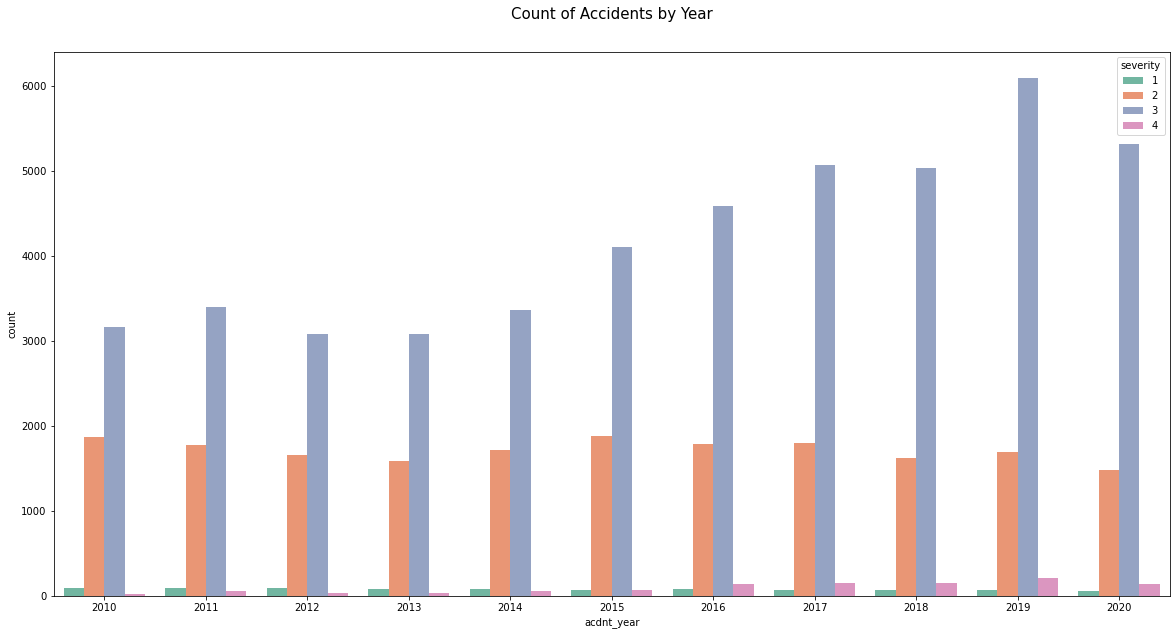

In [16]:
df_bl = train.copy()
df_bl.acdnt_year = df_bl.acdnt_year.astype(str)
plt.figure(figsize=(20, 10))
sns.countplot(x='acdnt_year', hue='severity', data=df_bl ,palette="Set2")

plt.title('Count of Accidents by Year', size=15, y=1.05)
plt.show()

In [17]:
# df_bl = train.copy()
# df_bl.acdnt_year = df_bl.acdnt_year.astype(str)
# plt.figure(figsize=(20, 10))
# sns.countplot(x='acdnt_year', hue='Severity4', data=df1 ,palette="Set2")

# plt.title('Count of Accidents by Year', size=15, y=1.05)
# plt.show()

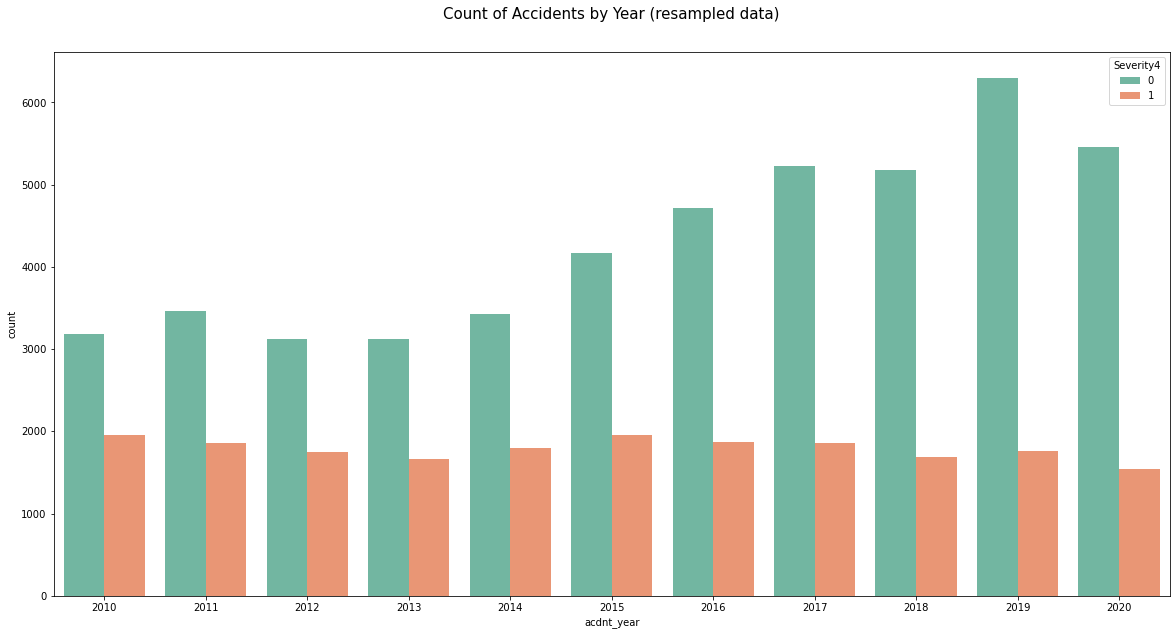

In [18]:
# df_bl = df1_bl.copy()
df_bl = df1.copy()
df_bl.acdnt_year = df_bl.acdnt_year.astype(str)
plt.figure(figsize=(20, 10))
sns.countplot(x='acdnt_year', hue='Severity4', data=df_bl ,palette="Set2")

plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.show()

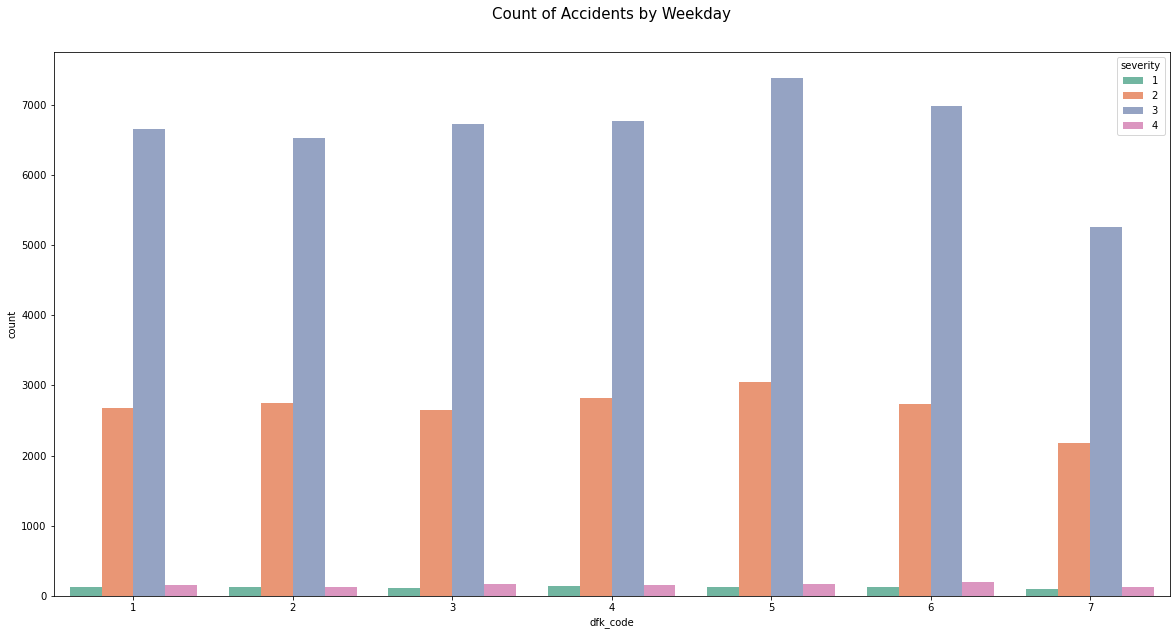

In [19]:
# Day of week

df_bl = train.copy()
df_bl.acdnt_year = df_bl.acdnt_year.astype(str)
plt.figure(figsize=(20, 10))
sns.countplot(x='dfk_code', hue='severity', data=df_bl ,palette="Set2")

plt.title('Count of Accidents by Weekday', size=15, y=1.05)
plt.show()

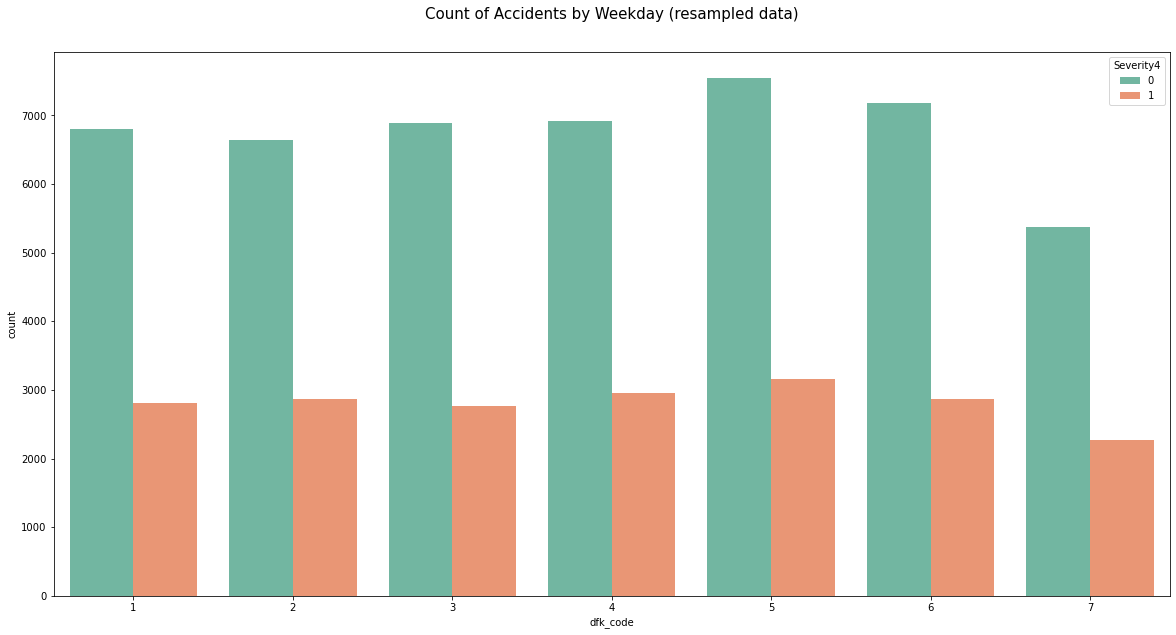

In [20]:
# df_bl = df1_bl.copy()
df_bl = df1.copy()
df_bl.acdnt_year = df_bl.acdnt_year.astype(str)
plt.figure(figsize=(20, 10))
sns.countplot(x='dfk_code', hue='Severity4', data=df_bl ,palette="Set2")

plt.title('Count of Accidents by Weekday (resampled data)', size=15, y=1.05)
plt.show()

In [21]:
# period_features = [1, 2]
# fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(13, 5))

# plt.subplots_adjust(wspace = 0.5)
# for i, feature in enumerate(period_features, 1):    
#     plt.subplot(1, 2, i)
#     sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="Set2")
    
#     plt.xlabel('{}'.format(feature), size=12, labelpad=3)
#     plt.ylabel('Accident Count', size=12, labelpad=3)    
#     plt.tick_params(axis='x', labelsize=12)
#     plt.tick_params(axis='y', labelsize=12)
    
#     plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
#     plt.title('Count of Severity in\n{} Feature'.format(feature), size=13, y=1.05)
# fig.suptitle

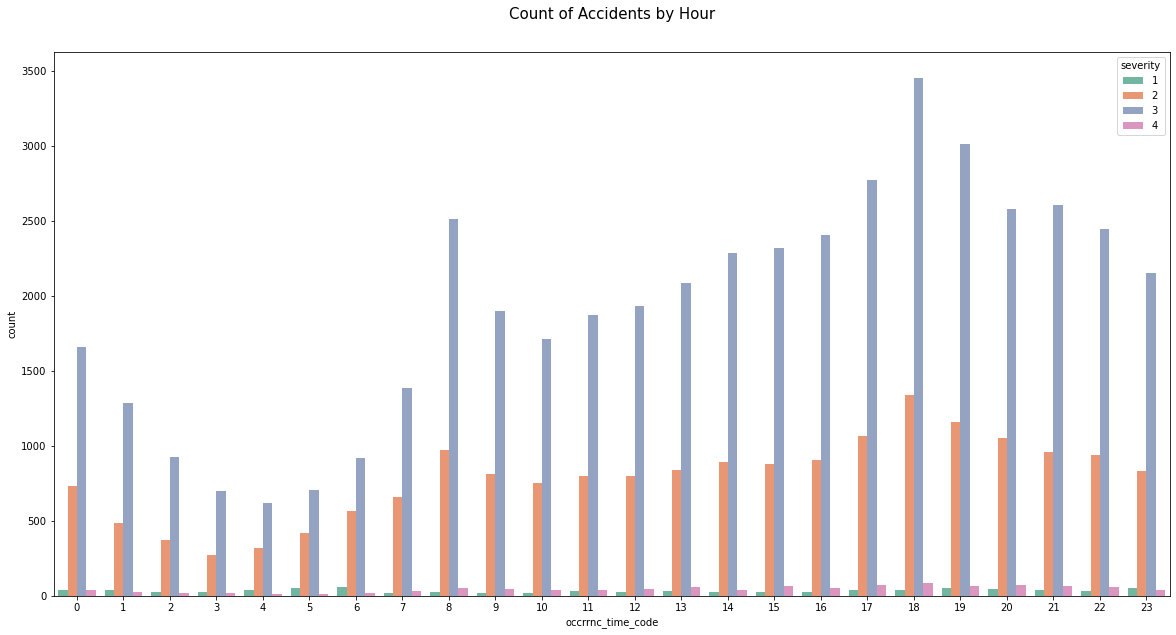

In [22]:
# Day of week

df_bl = train.copy()
df_bl.acdnt_year = df_bl.acdnt_year.astype(str)
plt.figure(figsize=(20, 10))
sns.countplot(x='occrrnc_time_code', hue='severity', data=df_bl ,palette="Set2")

plt.title('Count of Accidents by Hour', size=15, y=1.05)
plt.show()

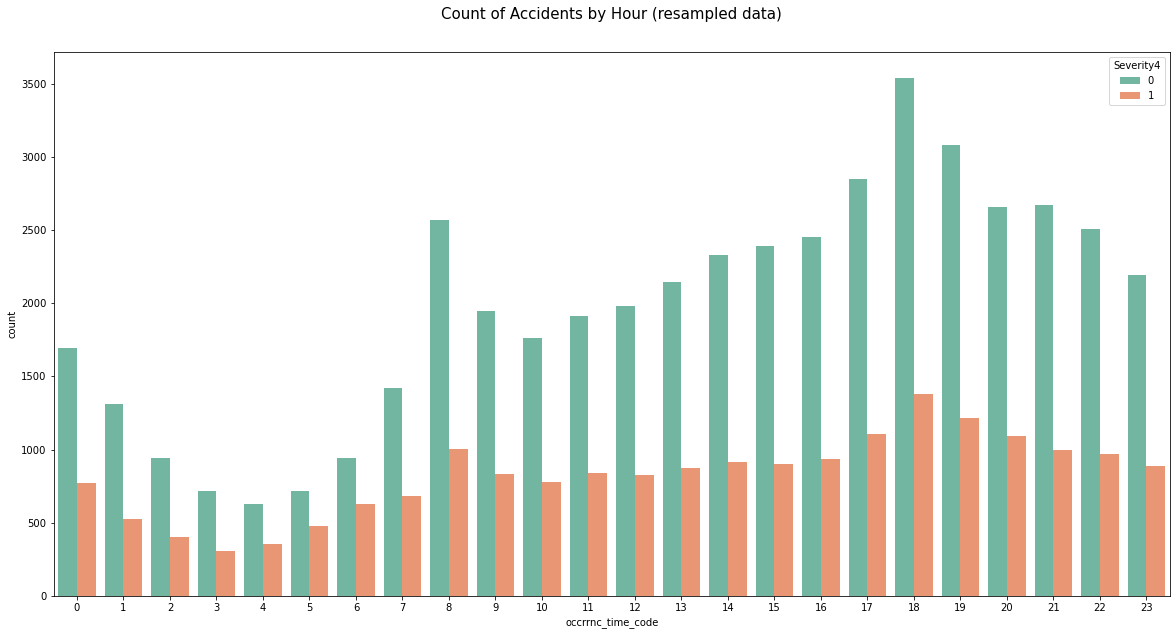

In [23]:
# df_bl = df1_bl.copy()
df_bl = df1.copy()
df_bl.acdnt_year = df_bl.acdnt_year.astype(str)
plt.figure(figsize=(20, 10))
sns.countplot(x='occrrnc_time_code', hue='Severity4', data=df_bl ,palette="Set2")

plt.title('Count of Accidents by Hour (resampled data)', size=15, y=1.05)
plt.show()

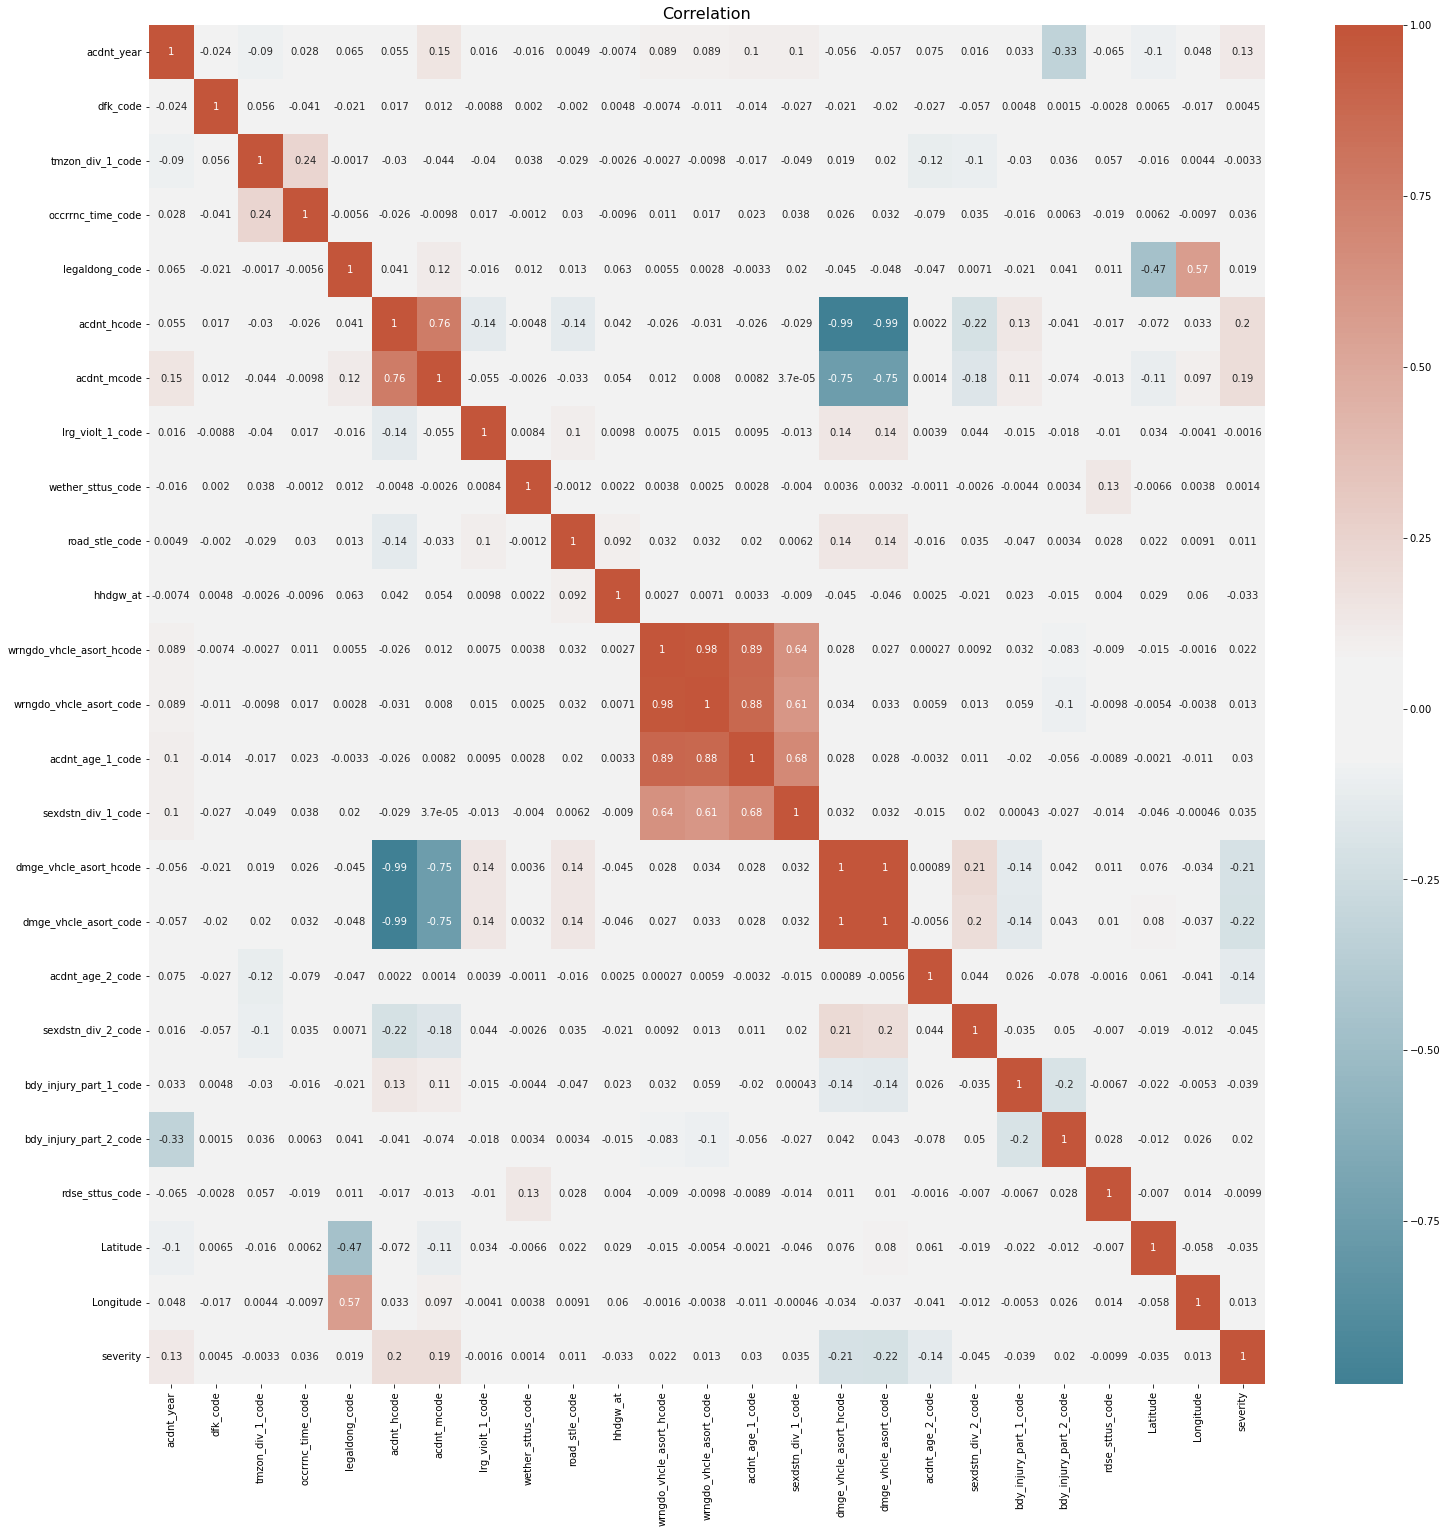

In [24]:
plt.figure(figsize=(25, 25))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(train.corr(), annot=True, cmap=cmap, center=0).set_title("Correlation", fontsize=16)
plt.show()

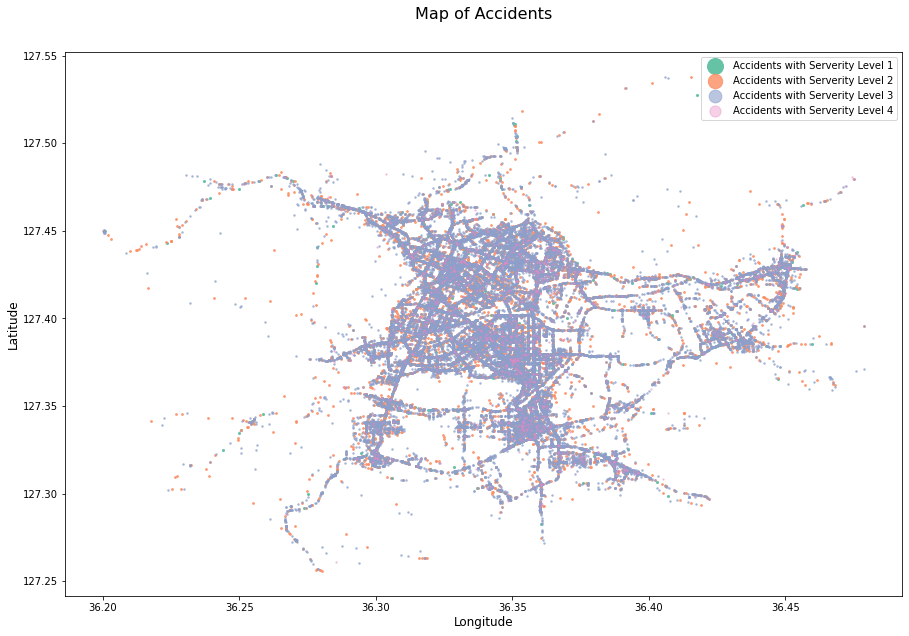

In [25]:
df_1 = train[train['severity']==1]
df_2 = train[train['severity']==2]
df_3 = train[train['severity']==3]
df_4 = train[train['severity']==4]



plt.figure(figsize=(15,10))

plt.plot( 'Longitude', 'Latitude', data=df_1, linestyle='', marker='o', markersize=2, color="#66c2a5", alpha=1, label='Accidents with Serverity Level 1')
plt.plot( 'Longitude', 'Latitude', data=df_2, linestyle='', marker='o', markersize=1.8, color= "#fc8d62", alpha=0.8, label='Accidents with Serverity Level 2')
plt.plot( 'Longitude', 'Latitude', data=df_3, linestyle='', marker='o', markersize=1.6, color="#8da0cb", alpha=0.6, label='Accidents with Serverity Level 3')
plt.plot( 'Longitude', 'Latitude', data=df_4, linestyle='', marker='o', markersize=1.4, color="#e78ac3", alpha=0.4, label='Accidents with Serverity Level 4')

plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

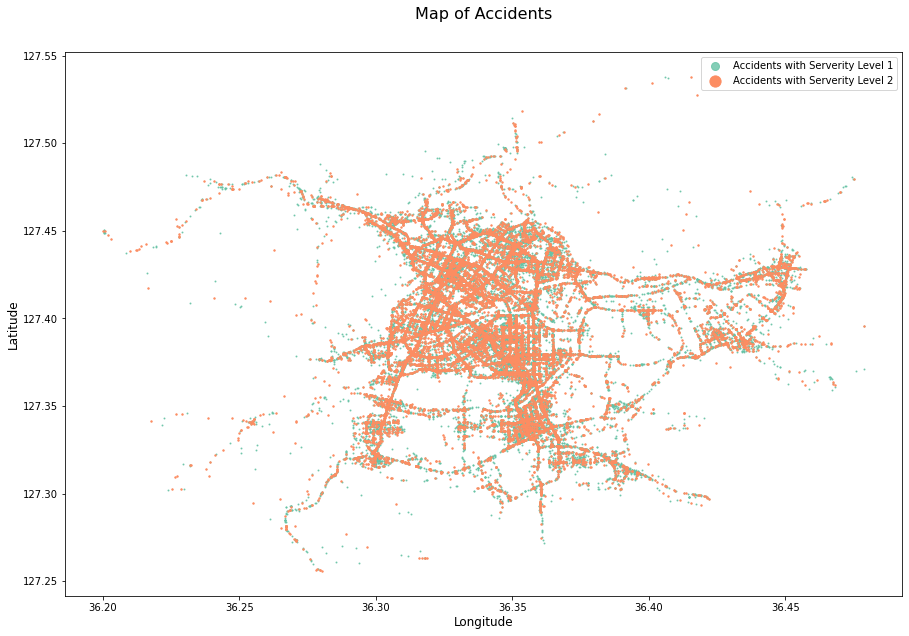

In [26]:
# df_bl = df1_bl.copy()
df_bl = df1.copy()
df_1 = df_bl[df_bl['Severity4']==0]
df_2 = df_bl[df_bl['Severity4']==1]



plt.figure(figsize=(15,10))

plt.plot( 'Longitude', 'Latitude', data=df_1, linestyle='', marker='o', markersize=1, color="#66c2a5", alpha=0.8, label='Accidents with Serverity Level 1')
plt.plot( 'Longitude', 'Latitude', data=df_2, linestyle='', marker='o', markersize=1.4, color="#fc8d62", alpha=1, label='Accidents with Serverity Level 2')

plt.legend(markerscale=8)
plt.xlabel('Longitude', size=12, labelpad=3)
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()


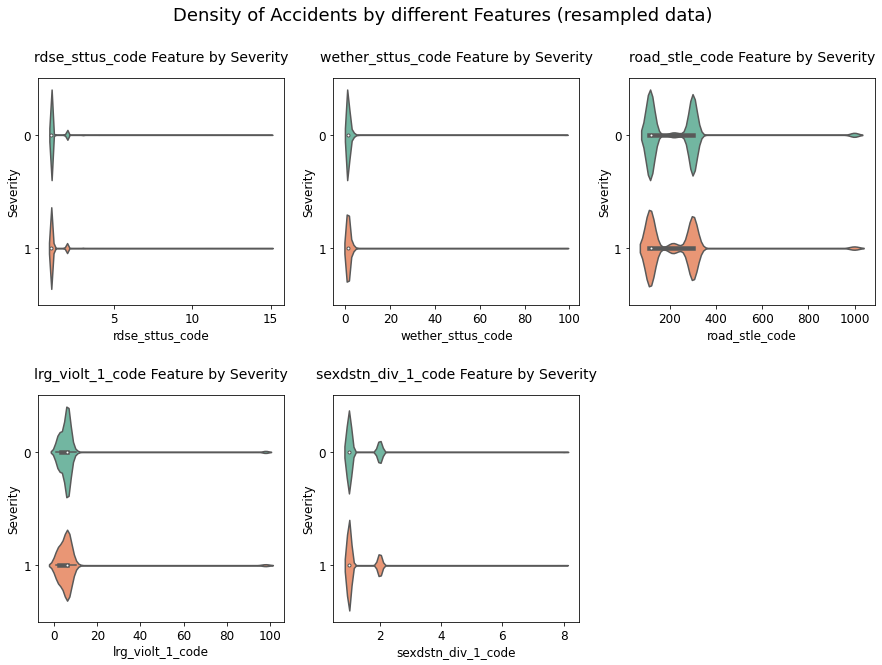

In [27]:
# df_bl = df1_bl.copy()
df_bl = df1.copy()

df_bl['Severity4'] = df_bl['Severity4'].astype('category')


num_features = ['rdse_sttus_code', 'wether_sttus_code', 'road_stle_code', 'lrg_violt_1_code', 'sexdstn_div_1_code']


fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.2)
for i, feature in enumerate(num_features, 1):    
    plt.subplot(2, 3, i)
    sns.violinplot(x=feature, y="Severity4", data=df_bl, palette="Set2")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Severity', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)

    plt.title('{} Feature by Severity'.format(feature), size=14, y=1.05)
fig.suptitle('Density of Accidents by different Features (resampled data)', fontsize=18)
plt.show()

Predictive Models

The models that we compare are listed as follows:

Machine Learning Models:
1. Random Forest Classifier
2. Logistic Regression Classifier
3. XGBoost Classifier
4. Support Vector Machine Classifier
5. Multilayer Perceptron Classifier

Deep Learning Models:
1. LSTM Classifier
2. CNN Classifier
3. ANN Classifier

In [28]:
# Call the required libraries

from sklearn.model_selection import GridSearchCV, KFold, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

import warnings
warnings.filterwarnings('ignore')

In [29]:
# Exclude the date column from the dataset

del df1['acdnt_dd_dc'] 
del df2['acdnt_dd_dc']


# Assign the 'Severity4' as target and other columns as features
X_train =  df1.drop(['Severity4'], axis = 1)
X_test =  df2.drop(['Severity4'], axis = 1)
y_train =  df1['Severity4']
y_test = df2['Severity4']

In [30]:
# You can use either n-fold under-sampling or simple random undersampling for resampling the imbalanaced classes of the data
# both are provided
rus = RandomUnderSampler(random_state=0)

X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
counter = Counter(y_train_res)
counter

Counter({0: 19703, 1: 19703})

In [31]:
# n folds random under-sampling
# def multi_rus(X, y, n_folds, ratio):
#     X_res = [None] * n_folds
#     y_res = [None] * n_folds
#     rus = RandomUnderSampler(sampling_strategy = ratio, random_state=42)
#     for i in range(n_folds):
#         X_res[i], y_res[i] = rus.fit_resample(X, y)
        
#     return X_res, y_res  

# X_train_res, y_train_res = multi_rus(X_train, y_train, 3, 0.1)

In [32]:
# Data normalization
# normalize the data after resampling

scaler = MinMaxScaler()
scaler.fit(X_train_res)
scaler.fit(X_test)



X_data = X_test.copy()

X_train_res = scaler.transform(X_train_res)
X_test = scaler.transform(X_test)

Machine Learning Models

In [33]:
# Random Forest algorithm

#Create a Gaussian Classifier
rf = RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train_res, y_train_res)

rf_y_pred = rf.predict(X_test)

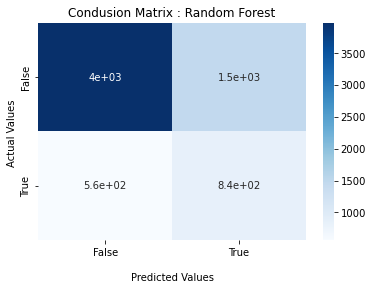

In [34]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, rf_y_pred)

#print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# ax.xaxis.set_ticklabels(['1', '2', '3', '4'])
# ax.yaxis.set_ticklabels(['1', '2', '3', '4'])
plt.title('Condusion Matrix : Random Forest')
## Display the visualization of the Confusion Matrix.
plt.show()

In [35]:
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      5439
           1       0.37      0.60      0.45      1408

    accuracy                           0.70      6847
   macro avg       0.62      0.67      0.63      6847
weighted avg       0.77      0.70      0.73      6847



In [36]:
# SVM algorithm
sv = svm.SVC() # Linear Kernel

#Train the model using the training sets
sv.fit(X_train_res, y_train_res)

#Predict the response for test dataset
sv_y_pred = sv.predict(X_test)

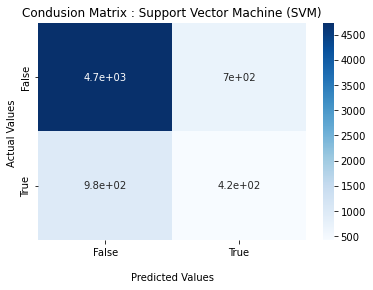

In [37]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, sv_y_pred)

#print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# ax.xaxis.set_ticklabels(['1', '2', '3', '4'])
# ax.yaxis.set_ticklabels(['1', '2', '3', '4'])
plt.title('Condusion Matrix : Support Vector Machine (SVM)')


## Display the visualization of the Confusion Matrix.
plt.show()

In [38]:
print(classification_report(y_test, sv_y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      5439
           1       0.38      0.30      0.33      1408

    accuracy                           0.75      6847
   macro avg       0.60      0.59      0.59      6847
weighted avg       0.73      0.75      0.74      6847



In [39]:
# MLP algorithm

mlp = MLPClassifier()
mlp.fit(X_train_res, y_train_res)

#Predict the response for test dataset
mlp_y_pred = mlp.predict(X_test)

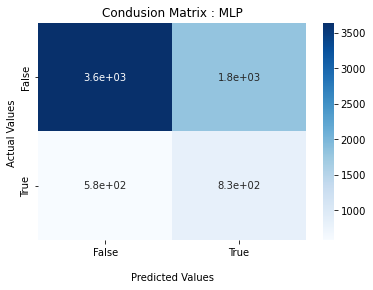

In [40]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, mlp_y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# ax.xaxis.set_ticklabels(['1', '2', '3', '4'])
# ax.yaxis.set_ticklabels(['1', '2', '3', '4'])
plt.title('Condusion Matrix : MLP')

## Display the visualization of the Confusion Matrix.
plt.show()

In [41]:
print(classification_report(y_test, mlp_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75      5439
           1       0.32      0.59      0.41      1408

    accuracy                           0.65      6847
   macro avg       0.59      0.63      0.58      6847
weighted avg       0.75      0.65      0.68      6847



In [42]:
# XGBoost algorithm

# fit model no training data
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)
xgb_y_pred = xgb.predict(X_test)

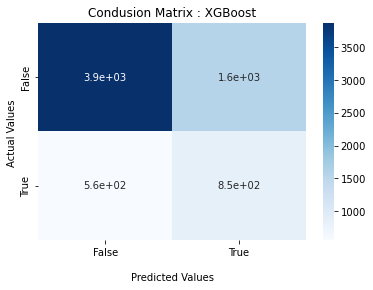

In [43]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, xgb_y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# ax.xaxis.set_ticklabels(['1', '2', '3', '4'])
# ax.yaxis.set_ticklabels(['1', '2', '3', '4'])
plt.title('Condusion Matrix : XGBoost')
## Display the visualization of the Confusion Matrix.
plt.show()

In [44]:
print(classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78      5439
           1       0.35      0.60      0.44      1408

    accuracy                           0.69      6847
   macro avg       0.61      0.66      0.61      6847
weighted avg       0.77      0.69      0.71      6847



In [45]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

# fit the model with data
lr.fit(X_train_res, y_train_res)

#
lr_y_pred=lr.predict(X_test)

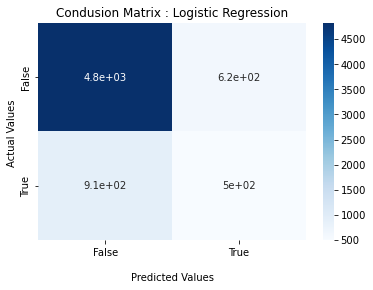

In [46]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, lr_y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

# ax.xaxis.set_ticklabels(['1', '2', '3', '4'])
# ax.yaxis.set_ticklabels(['1', '2', '3', '4'])
plt.title('Condusion Matrix : Logistic Regression')
## Display the visualization of the Confusion Matrix.
plt.show()

In [47]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      5439
           1       0.45      0.35      0.39      1408

    accuracy                           0.78      6847
   macro avg       0.64      0.62      0.63      6847
weighted avg       0.76      0.78      0.77      6847



In [48]:
# ANN Algorithm

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=24, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(X_train_res, y_train_res, epochs= 100 , batch_size=100, verbose=1)

Epoch 1/100
395/395 [==============================] - 1s 2ms/step - loss: 0.6591 - accuracy: 0.6035
Epoch 2/100
395/395 [==============================] - 1s 3ms/step - loss: 0.6439 - accuracy: 0.6244
Epoch 3/100
395/395 [==============================] - 1s 2ms/step - loss: 0.6417 - accuracy: 0.6270
Epoch 4/100
395/395 [==============================] - 1s 2ms/step - loss: 0.6404 - accuracy: 0.6282
Epoch 5/100
395/395 [==============================] - 1s 2ms/step - loss: 0.6388 - accuracy: 0.6287
Epoch 6/100
395/395 [==============================] - 1s 2ms/step - loss: 0.6370 - accuracy: 0.6308
Epoch 7/100
395/395 [==============================] - 1s 2ms/step - loss: 0.6364 - accuracy: 0.6304
Epoch 8/100
395/395 [==============================] - 1s 2ms/step - loss: 0.6343 - accuracy: 0.6346
Epoch 9/100
395/395 [==============================] - 1s 2ms/step - loss: 0.6331 - accuracy: 0.6367
Epoch 10/100
395/395 [==============================] - 1s 1ms/step - loss: 0.6306 - accura

In [49]:
y_pred_keras = keras_model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

214/214 [==============================] - 0s 1ms/step


In [50]:
y_pred_keras[y_pred_keras > 0.5] = 1
y_pred_keras[y_pred_keras < 0.5] = 0

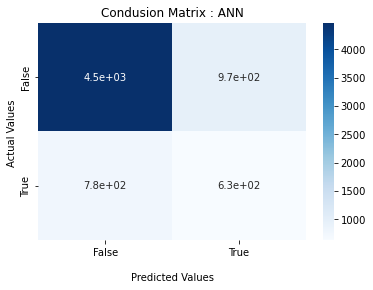

In [51]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_keras)

#print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.title('Condusion Matrix : ANN')

## Display the visualization of the Confusion Matrix.
plt.show()

In [52]:
auc_keras = auc(fpr_keras, tpr_keras)

In [54]:
# CNN algorithm

# Reshape data to fit CNN input
X_train = X_train_res.reshape(X_train_res.shape[0], X_train_res.shape[1], 1)

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_res.shape[1], 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_res, y_train_res, epochs=30, batch_size=40)

Epoch 1/30
986/986 [==============================] - 6s 6ms/step - loss: 0.6490 - accuracy: 0.6191
Epoch 2/30
986/986 [==============================] - 6s 6ms/step - loss: 0.6202 - accuracy: 0.6602
Epoch 3/30
986/986 [==============================] - 5s 5ms/step - loss: 0.6128 - accuracy: 0.6706
Epoch 4/30
986/986 [==============================] - 6s 6ms/step - loss: 0.6091 - accuracy: 0.6742
Epoch 5/30
986/986 [==============================] - 6s 6ms/step - loss: 0.6086 - accuracy: 0.6759
Epoch 6/30
986/986 [==============================] - 6s 6ms/step - loss: 0.6066 - accuracy: 0.6776
Epoch 7/30
986/986 [==============================] - 5s 5ms/step - loss: 0.6036 - accuracy: 0.6794
Epoch 8/30
986/986 [==============================] - 5s 5ms/step - loss: 0.6022 - accuracy: 0.6815
Epoch 9/30
986/986 [==============================] - 6s 6ms/step - loss: 0.6004 - accuracy: 0.6827
Epoch 10/30
986/986 [==============================] - 5s 5ms/step - loss: 0.5993 - accuracy: 0.6833

In [55]:
# Load the test data and reshape it
X_test_ = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Make predictions on the test data
y_pred_prob_cnn = model.predict(X_test_)  # predicted probabilities of being in class 1
y_pred_cnn = (y_pred_prob_cnn > 0.5).astype(int)  # predicted class labels (0 or 1)

214/214 [==============================] - 1s 2ms/step


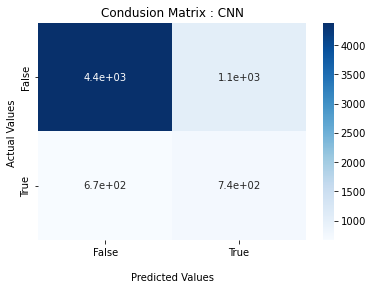

In [56]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_cnn)

#print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.title('Condusion Matrix : CNN')

## Display the visualization of the Confusion Matrix.
plt.show()

In [57]:
# Compute the ROC curve and AUC
fpr_cnn, tpr_cnn, thresholds = roc_curve(y_test, y_pred_prob_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

In [58]:
# LSTM Algorithm

X_train = X_train_res.reshape(X_train_res.shape[0], X_train_res.shape[1], 1)

# Define the LSTM classifier model
model = Sequential()
model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_res, epochs=40, batch_size=32)

# Make predictions on new data
y_pred_prob_lstm = model.predict(X_test_)

Epoch 1/40
1232/1232 [==============================] - 11s 8ms/step - loss: 0.6663 - accuracy: 0.5915
Epoch 2/40
1232/1232 [==============================] - 8s 7ms/step - loss: 0.6610 - accuracy: 0.6017
Epoch 3/40
1232/1232 [==============================] - 9s 7ms/step - loss: 0.6592 - accuracy: 0.6072
Epoch 4/40
1232/1232 [==============================] - 11s 9ms/step - loss: 0.6570 - accuracy: 0.6065
Epoch 5/40
1232/1232 [==============================] - 10s 8ms/step - loss: 0.6562 - accuracy: 0.6074
Epoch 6/40
1232/1232 [==============================] - 11s 9ms/step - loss: 0.6549 - accuracy: 0.6080
Epoch 7/40
1232/1232 [==============================] - 10s 8ms/step - loss: 0.6544 - accuracy: 0.6106
Epoch 8/40
1232/1232 [==============================] - 13s 11ms/step - loss: 0.6537 - accuracy: 0.6099
Epoch 9/40
1232/1232 [==============================] - 12s 10ms/step - loss: 0.6531 - accuracy: 0.6099
Epoch 10/40
1232/1232 [==============================] - 11s 9ms/step - l

In [59]:
y_pred_lstm = (y_pred_prob_lstm > 0.5).astype(int) 

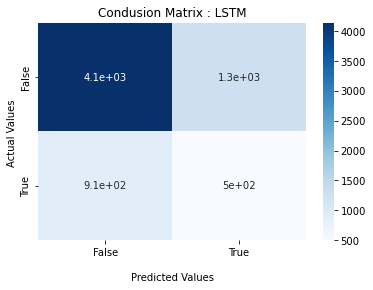

In [60]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_lstm)

#print(cf_matrix)


ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.title('Condusion Matrix : LSTM')

## Display the visualization of the Confusion Matrix.
plt.show()

In [61]:
# Calculate the ROC curve
fpr_lstm, tpr_lstm, thresholds = roc_curve(y_test, y_pred_prob_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

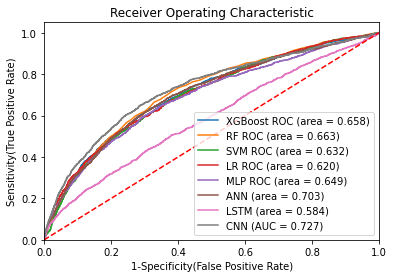

In [62]:
sv_svc = LinearSVC()
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'XGBoost',
    'model': XGBClassifier(),
},
{
    'label': 'RF',
    'model': RandomForestClassifier(),
},
{
    'label': 'SVM',
    'model': CalibratedClassifierCV(sv_svc),
},
{
    'label': 'LR',
    'model': LogisticRegression(solver='lbfgs', max_iter=1000),
},
{
    'label': 'MLP',
    'model': MLPClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
  
    model = m['model'] # select the model
    model.fit(X_train_res, y_train_res) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.3f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot(fpr_keras, tpr_keras, label='ANN (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_lstm, tpr_lstm,  label='LSTM (area = %0.3f)' % roc_auc_lstm)
plt.plot(fpr_cnn, tpr_cnn, label='CNN (AUC = %0.3f)' % roc_auc_cnn)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [63]:
# Save all the results

# X_data['target'] = y_test
# X_data['rf_results'] = rf_y_pred
# X_data['sv_results'] = sv_y_pred
# X_data['mlp_results'] = mlp_y_pred
# X_data['xgb_results'] = xgb_y_pred
# X_data['lr_results'] = lr_y_pred
# X_data['ann_results'] = y_pred_keras
# X_data['cnn_results'] = y_pred_cnn
# X_data['lstm_results'] = y_pred_lstm

# X_data.to_csv('results.csv')

The best performance in terms of ROC is for CNN algorithm. So, we visualize the result in the form of density map on the grids

![title](test_predicted_severe_accident_density.png)